In [1]:
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN, KMeans

plt.rcParams["figure.dpi"] = 150
plt.rcParams["figure.figsize"] = (10, 6)



In [2]:
centers = [
    [1, 0.5],
    [2, 2],
    
]

stds = [ 0.4, 0.2 ]

X, y = make_blobs(
    n_samples=1000,
    centers=centers,
    cluster_std=stds,
    random_state=42
)

print(X.shape)
print(y.shape)



(1000, 2)
(1000,)


<Axes: >

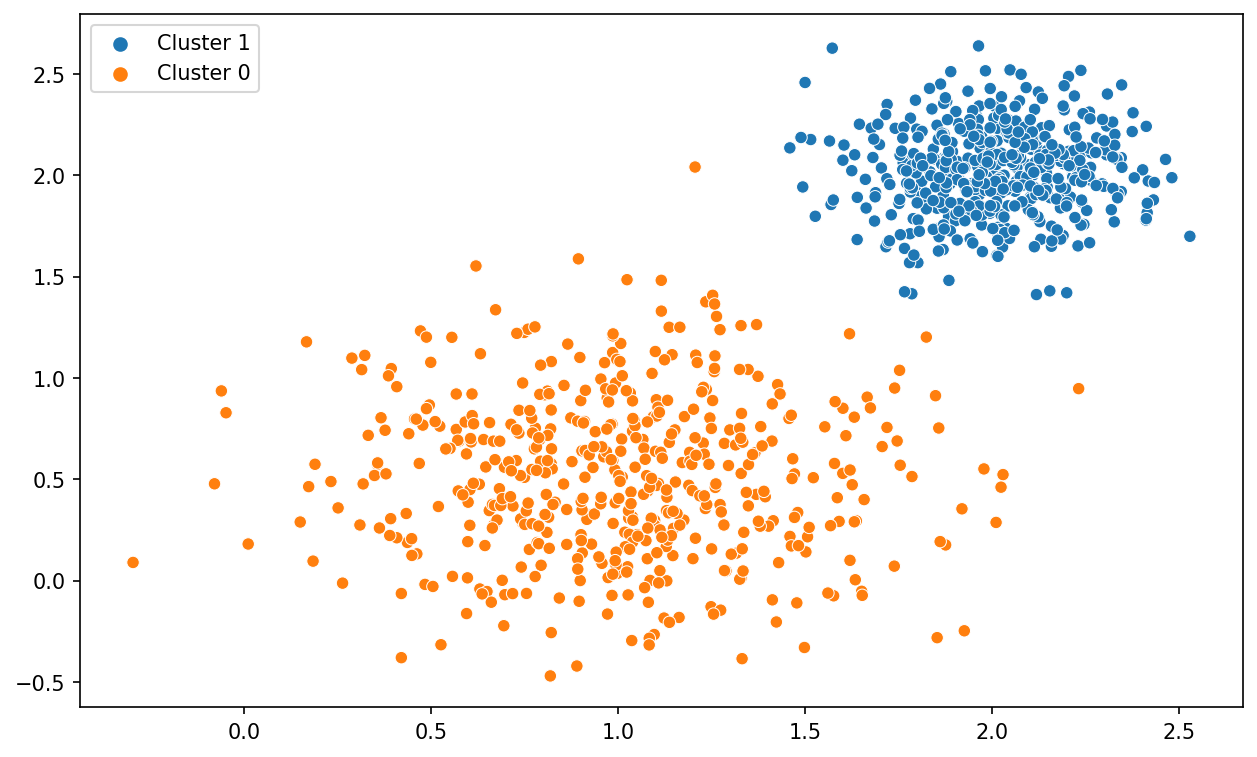

In [3]:
sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=[ f"Cluster {x}" for x in y ]
)

In [4]:
db = DBSCAN(
    eps=0.5, 
    min_samples = 10
).fit(X)

labels = db.labels_

print(np.array(labels).shape)
print(labels)


(1000,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 

In [5]:
def describe_dbscan(X, labels):
    n_clusters = len(set(labels))
    if 0 in labels:
        n_clusters = n_clusters - 1
    print(f"N. cluster individuati: {n_clusters}")
    print(f"N. outlier individuati: {list(labels).count(-1)}")
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=[ f"Cluster {x}" for x in labels ]
    )
    

N. cluster individuati: 0
N. outlier individuati: 0


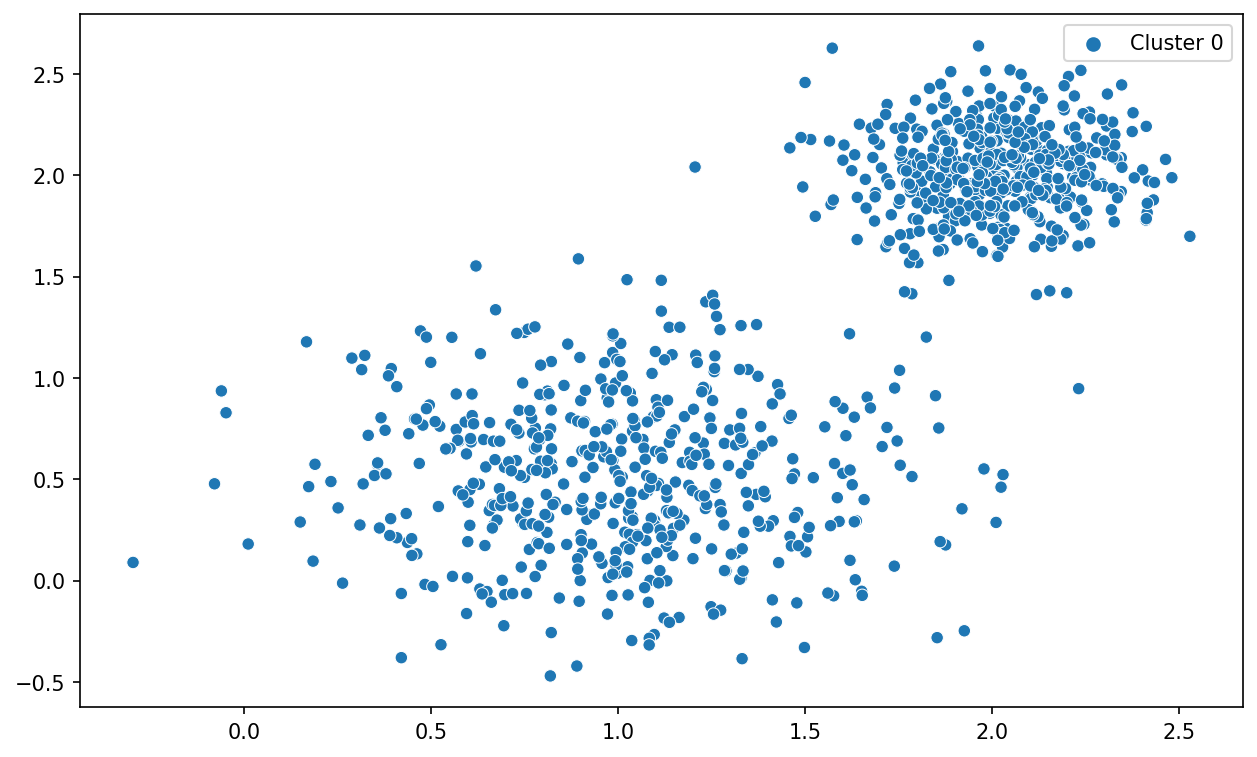

In [6]:
describe_dbscan(X, labels)

In [7]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=11)
neighbors = nn.fit(X)

distances, indices = nn.kneighbors(X)

print(distances.shape)
print(X[0])
print(distances[0])


distances = np.sort(distances[:, 10], axis=0)

i = np.arange(len(distances))

(1000, 11)
[2.20481251 2.11850539]
[0.         0.01385376 0.02073425 0.02130078 0.02661348 0.02714839
 0.03482333 0.03638316 0.03781438 0.03944942 0.040289  ]


Text(0, 0.5, 'Distanze')

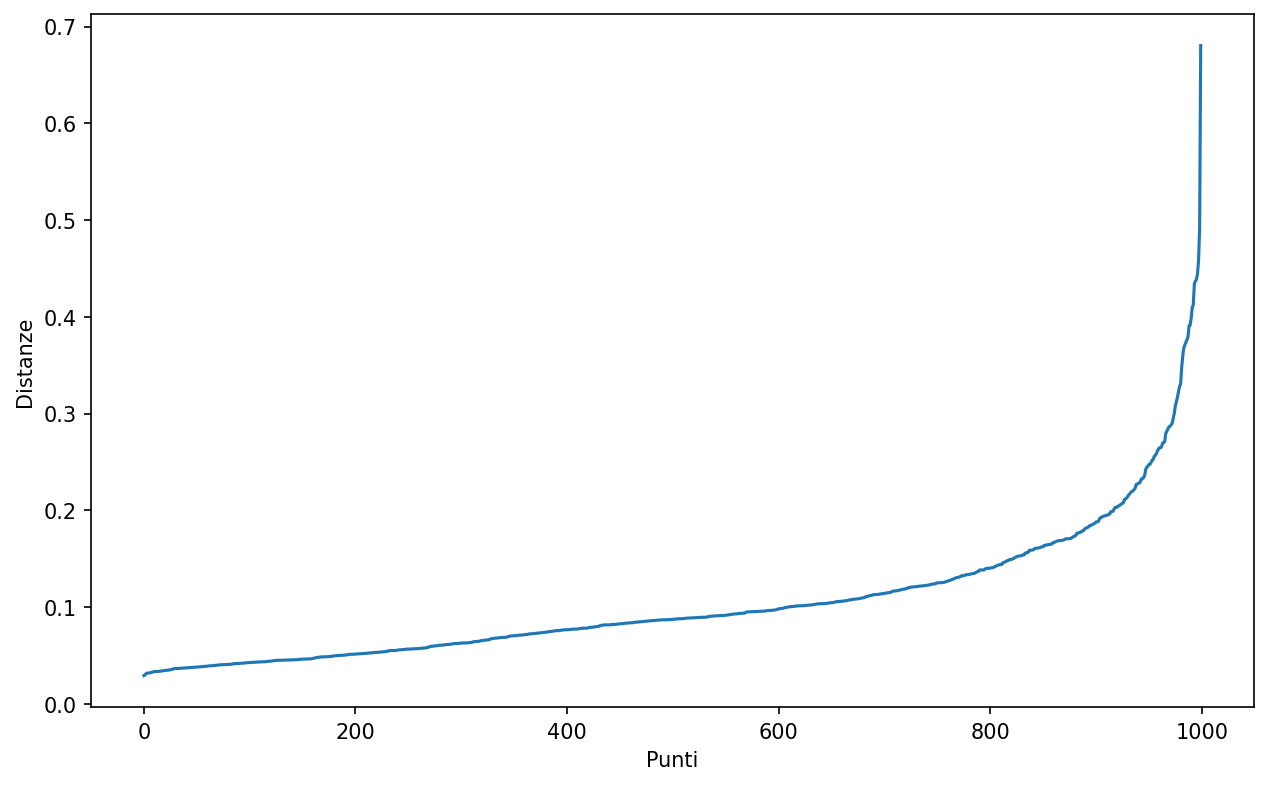

In [8]:
fig = plt.figure()
plt.plot(distances)
plt.xlabel("Punti")
plt.ylabel("Distanze")

N. cluster individuati: 2
N. outlier individuati: 5


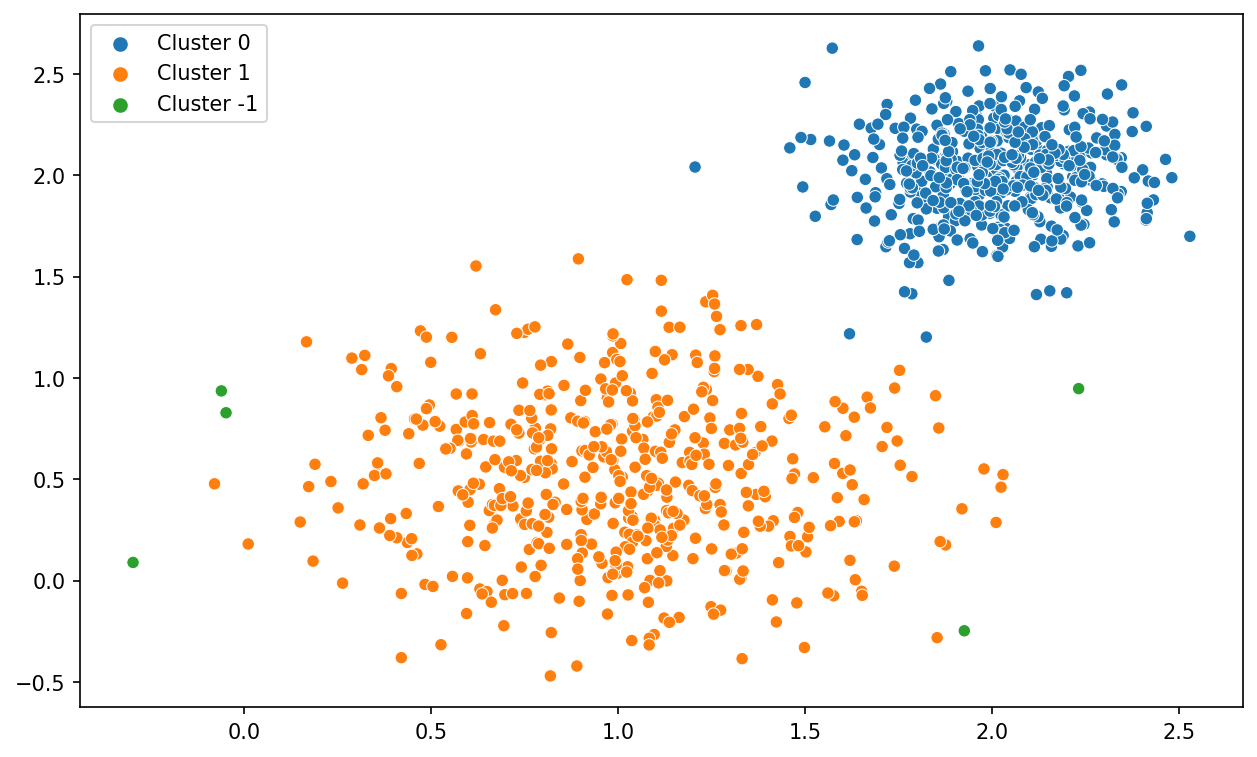

In [9]:
db = DBSCAN(
    eps=0.3, 
    min_samples = 10
).fit(X)

describe_dbscan(X, db.labels_)

0.20330420620520276


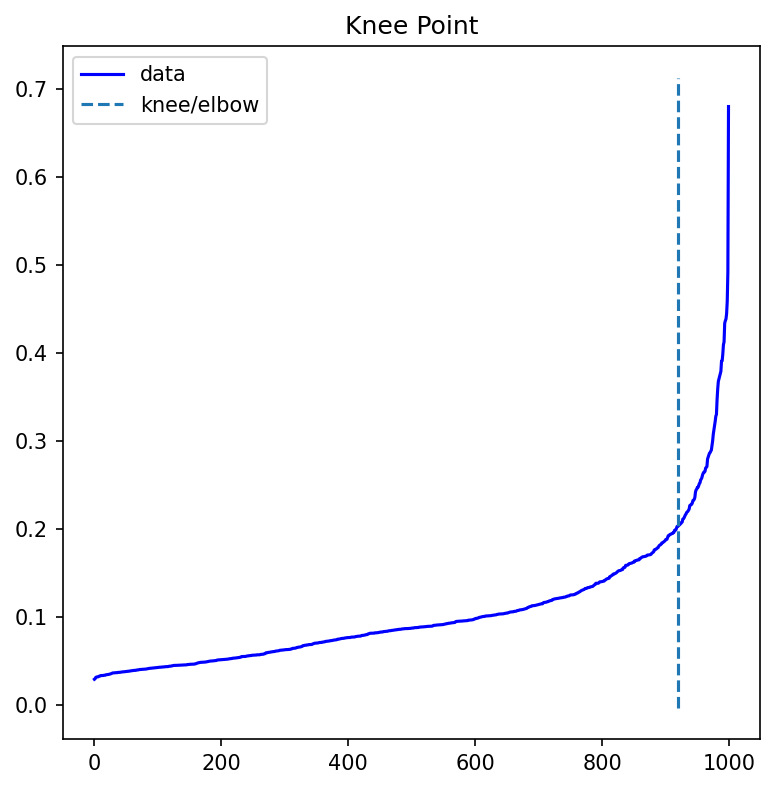

In [10]:
!pip install kneed

from kneed import KneeLocator



kl = KneeLocator(
    i, 
    distances, 
    curve="convex"
)
kl.plot_knee()


print(distances[kl.knee])


N. cluster individuati: 2
N. outlier individuati: 15


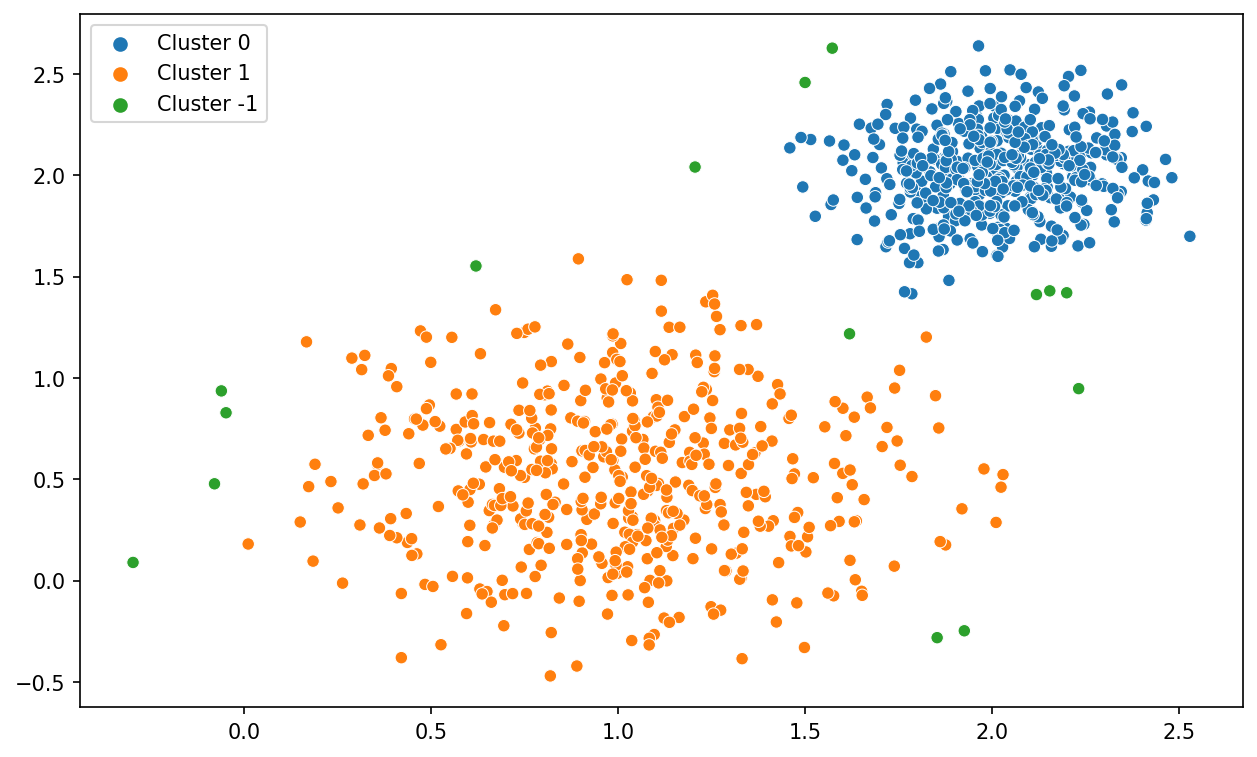

In [11]:
from sklearn.cluster import DBSCAN



db = DBSCAN(
    eps=distances[kl.knee], 
    min_samples = 4
).fit(X)

describe_dbscan(X, db.labels_)